<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

<h3>1. Import all the necessary libraries. </h3>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 15
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.font_manager import FontProperties

<h3>2. Load the CSV file (i.e. Retail.csv) and display the first 5 rows of the dataframe.</h3>

In [3]:
df=pd.read_csv('Retail.csv')

In [4]:
df.head(n=5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04


<h3>3. Check the info of the data frame.</h3>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 11 columns):
order_id                101335 non-null object
order_item_id           101335 non-null int64
product_id              101335 non-null object
seller_id               101335 non-null object
shipping_limit_date     101335 non-null object
price                   101335 non-null float64
freight_value           101335 non-null float64
payment_sequential      101335 non-null int64
payment_type            101335 non-null object
payment_installments    101335 non-null int64
payment_value           101335 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 8.5+ MB


<h3>4.Check the shape of the data frame. Check if there are any missing values in any column of the dataset.</h3>

In [6]:
print("The shape of the dataframe",df.shape)
print("*"*20)
print("The missing value of each columns of the dataframe",df.isnull().sum())

The shape of the dataframe (101335, 11)
********************
The missing value of each columns of the dataframe order_id                0
order_item_id           0
product_id              0
seller_id               0
shipping_limit_date     0
price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


<h3>5. Check the statistical summary of the data frame and write your findings.</h3>

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,101335.0,1.205280,0.715244,1.00,1.00,1.00,1.00,21.00
price,101335.0,79.818332,56.057932,0.85,35.99,63.90,109.90,270.00
freight_value,101335.0,16.126716,5.943237,0.00,12.69,15.47,18.67,36.00
payment_sequential,101335.0,1.089495,0.689100,1.00,1.00,1.00,1.00,26.00
payment_installments,101335.0,2.671703,2.524321,0.00,1.00,1.00,3.00,24.00
payment_value,101335.0,124.124508,124.418064,0.00,55.55,95.40,155.84,3195.73


- In the "price" column the mean is greater than the median. It indicates the distribution is positively skewed.
- In the "payment_value" column the mean is greater than the median. It indicates the distribution is positively skewed.
- In the "payment_value" 75% values are less than or equal to 156 whereas the max value is 3195. It seems like this column has some extreme outliers.

<h3> 6. Plot the count plot of the ‘payment_type’. Which payment mode is used the lowest number of times to purchase the products.

<AxesSubplot:xlabel='payment_type', ylabel='count'>

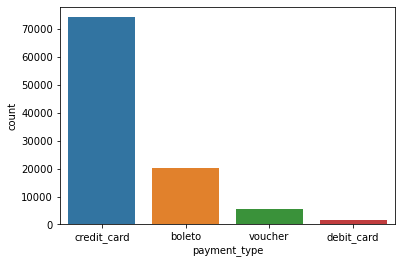

In [8]:
sns.countplot(df['payment_type'])

- Debit card is the most less used payment method.

<h3>7. Do a bivariate analysis between the ‘payment_type’ column and ‘payment_installments’ Column. Plot a bar plot that represents all the payment_type labels of all “payment_installments”.</h3>

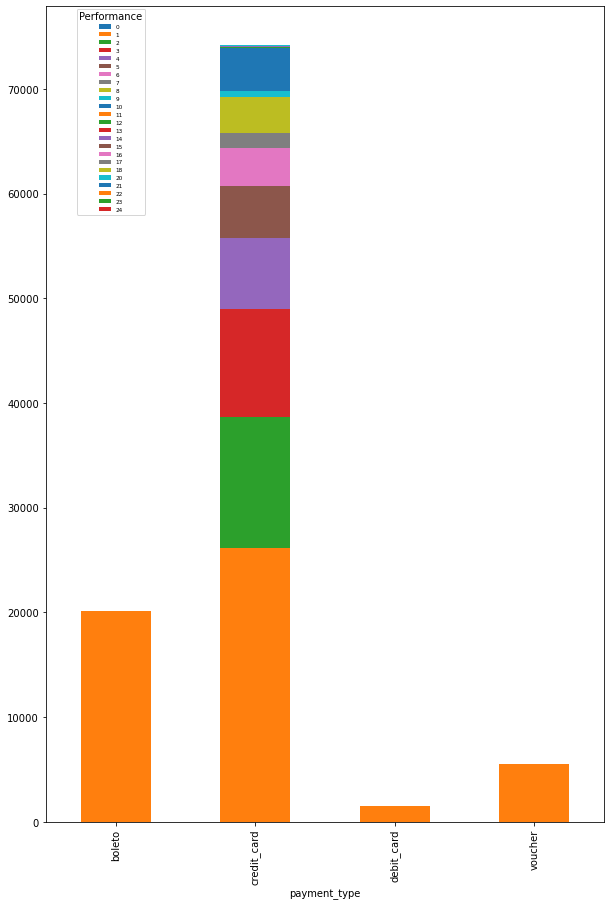

In [14]:
def visualize_payment_type_installments(df):
    fontP = FontProperties()
    fontP.set_size('xx-small')
    pd.crosstab(df['payment_type'],df['payment_installments']).plot.bar(stacked=True)
    plt.legend(title='Performance', bbox_to_anchor=(0.05, 1), loc='upper left', prop=fontP)
    plt.show()
    
visualize_payment_type_installments(df)

<h3>8.Plot a pair plot of all the columns using hue as the ‘payment_type’ and share your insights.</h3>

In [15]:
import warnings
warnings.filterwarnings("ignore")

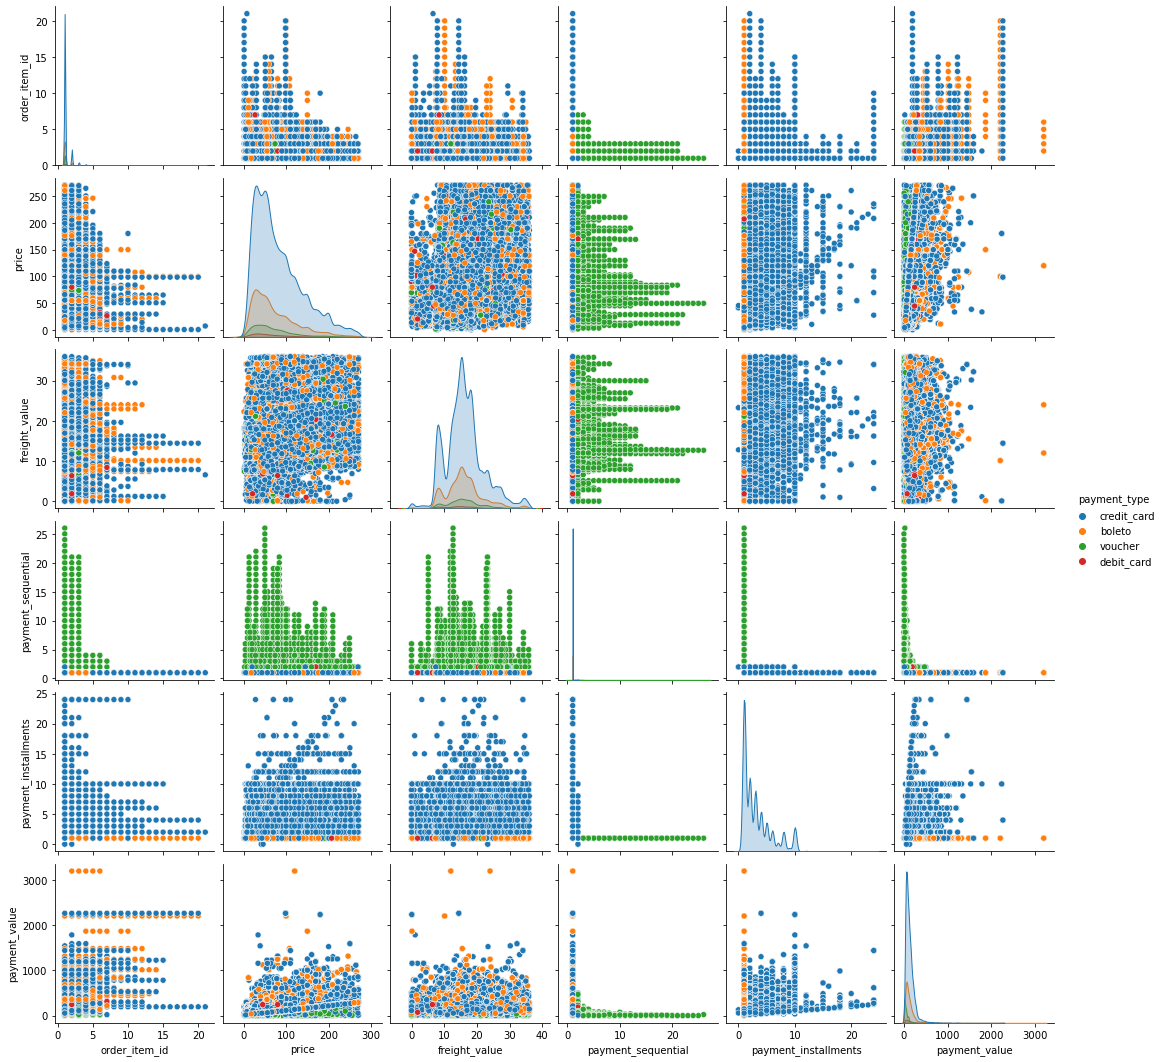

In [ ]:
sns.pairplot(df,hue='payment_type')

- It looks like none of the feature is separating the data perfectly.

<h3>9.Plot a heatmap that consists of the correlation between all the columns of the data frame.</h3>


<AxesSubplot:>

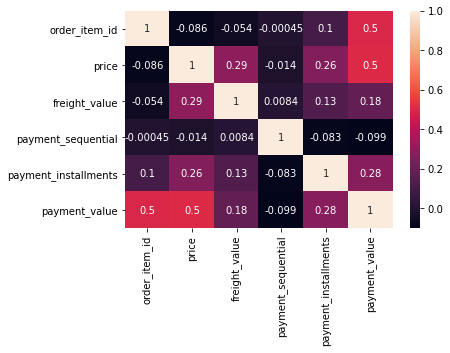

In [ ]:
sns.heatmap(df.corr(),annot=True)

- "price" and "payment_value" have the highest correlation(i.e. 0.5).
- As "payment_sequential" column has very less correlation with the target column (i.e. price). If we have a lot of features we can drop this kind of feature.

<h3>10.Do a frequency encoding of the column”payment_type” and store it in a new column name as “payment_freq”.</h3>

In [17]:
payment_grp=(df.groupby('payment_type').size()) / len(df)
df['payment_freq']=df['payment_type'].apply(lambda x:payment_grp[x])

In [18]:
df.head(n=5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,payment_freq
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,0.73187
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,0.73187
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,0.73187
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,0.73187
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04,0.73187


<h1>Model building and Evaluation </h1>

<h3>1.Drop('order_id','order_item_id','product_id','seller_id','shipping_limit_date','payment_type') columns from the dataset.</h3>


In [19]:
df.drop(['order_id','order_item_id','product_id','seller_id','shipping_limit_date','payment_type'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 6 columns):
price                   101335 non-null float64
freight_value           101335 non-null float64
payment_sequential      101335 non-null int64
payment_installments    101335 non-null int64
payment_value           101335 non-null float64
payment_freq            101335 non-null float64
dtypes: float64(4), int64(2)
memory usage: 4.6 MB


<h3>2.Store the target column(i.e. price) in the y variable and the rest of the columns in the X variable.</h3>

In [21]:
y=df['price']
df.drop(['price'],axis=1,inplace=True)
X=df

In [22]:
new_x=X.as_matrix()
new_y=y.as_matrix()
new_y=new_y.reshape(-1,1)

<h3>3. Split the dataset into two parts(i.e. 70% train and 30% test) using random_state=42.</h3>

In [23]:
X_train, X_test, y_train, y_test = train_test_split(new_x,new_y, test_size = 0.30,random_state=42)

<h3>4.Train a linear regression model and print the r2_score for both the train and test set.</h3>


In [24]:
regr=LinearRegression()
regr.fit(X_train,y_train)
y_pred_train=regr.predict(X_train)
y_pred_test=regr.predict(X_test)
print("Train r2 score",r2_score(y_train,y_pred_train))
print("Test r2 score",r2_score(y_test,y_pred_test))

Train r2 score 0.3080167434866391
Test r2 score 0.3126078219940568


- Test r2 score is very less.

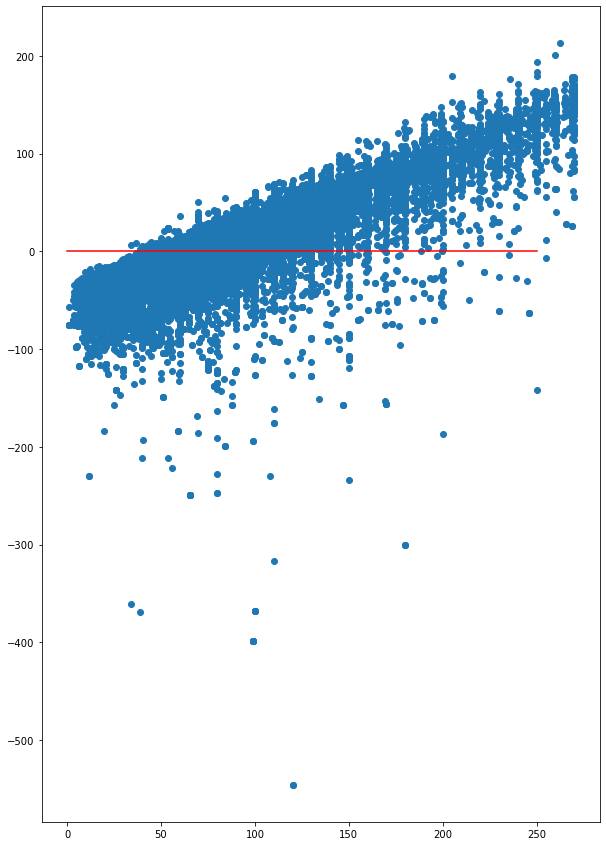

In [37]:
def plot_reg(y_test,y_pred_test):
    resd=y_test-y_pred_test
    plt.scatter(x=y_test,y=resd)
    plt.plot([0,250],[0,0],color='r')

plot_reg(y_test,y_pred_test)

- Since the residuals are not randomly distributed along the line. So this reflects a linear model is not a good option for this model. 
- We can observe the same from the r2 score, correlation matrix, and pair-plot.